# INFX 574: Problem Set 5

### Prateek Tripathi

## 1) 'Active' Data Exploration

### 1.1) Load the data. It is included in sklearn.datasets and you can find many copies on the internet too. Make sure you know the coding of all variables. In particular, you should be aware if a variable is categorical or numeric. Explain the coding scheme if it's not obvious.

In [1]:
# import the required modules
import numpy as np
import pandas as pd
import random
import time
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

from sys import getsizeof
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.decomposition import PCA

np.random.RandomState(seed = 1)
np.random.seed(1)

# import the dataset
from sklearn.datasets import load_boston

In [2]:
# explore the dataset
boston = load_boston()

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
# create a dataframe of the boston dataset
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

# add the target column
boston_df['MEDV'] = boston.target

boston_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [4]:
# explore the dataset further
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
# explore the dataset further
boston_df.info()

# it appears from the dataset that 'RAD' and 'CHAS' are the two categorical variables
print("\n\nRAD (index of accessibility to radial highways):\n", boston_df.groupby(['RAD'])['RAD'].count())
print("\n\nCHAS (Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)):\n", boston_df.groupby(['CHAS'])['CHAS'].count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


RAD (index of accessibility to radial highways):
 RAD
1.0      20
2.0      24
3.0      38
4.0     110
5.0     115
6.0      26
7.0      17
8.0      24
24.0    132
Name: RAD, dtype: int64


CHAS (Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)):
 CHAS
0.0    471
1.0     35
Name: CHAS, dtype: int64


We observe that all the 13 features and the target are numeric (float64).

'RAD' appears to be an ordinal variable where we're not sure if the spacing between the values is the same or not.

'CHAS' is a categorical variable where,

- 1 represents if 'tract bounds the Charles River'
- 0 if otherwise

### 1.2) Add some (10 or so) engineered features (synthetic features) to the data. As in the previous problem set, you may use various mathematical operations on a single or multiple features to create new ones.

In [6]:
# engineer features
boston_df['LSTAT2'] = boston_df['LSTAT'] ** 2                               # 1
boston_df['RM2'] = boston_df['RM'] ** 2                                     # 2
boston_df['PTRATIO2'] = boston_df['PTRATIO'] ** 2                           # 3
boston_df['INDUS2'] = boston_df['INDUS'] ** 2                               # 4

boston_df['LSTAT.RM'] = boston_df['LSTAT'] * boston_df['RM']                # 5
boston_df['LSTAT.PTRATIO'] = boston_df['LSTAT'] * boston_df['PTRATIO']      # 6
boston_df['LSTAT.INDUS'] = boston_df['LSTAT'] * boston_df['INDUS']          # 7
boston_df['RM.PTRATIO'] = boston_df['RM'] * boston_df['PTRATIO']            # 8
boston_df['RM.INDUS'] = boston_df['RM'] * boston_df['INDUS']                # 9
boston_df['PTRATIO.INDUS'] = boston_df['PTRATIO'] * boston_df['INDUS']      # 10

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTAT2,RM2,PTRATIO2,INDUS2,LSTAT.RM,LSTAT.PTRATIO,LSTAT.INDUS,RM.PTRATIO,RM.INDUS,PTRATIO.INDUS
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,24.8004,43.230625,234.09,5.3361,32.74350,76.194,11.5038,100.5975,15.18825,35.343
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,83.5396,41.229241,316.84,49.9849,58.68794,162.692,64.6198,114.2938,45.39647,125.846
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,16.2409,51.624225,316.84,49.9849,28.95555,71.734,28.4921,127.8930,50.79795,125.846
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,8.6436,48.972004,349.69,4.7524,20.57412,54.978,6.4092,130.8626,15.25564,40.766
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,28.4089,51.079609,349.69,4.7524,38.09351,99.671,11.6194,133.6489,15.58046,40.766


### 1.3) Add another set (10 or so) bogus features, variables that have no relationship whatsoever to Boston housing market. You may just pick random numbers, or numbers from irrelevant sources, such as population of Chinese cities or baseball scores of yesteryear. Give these features distinct names (such as B1-B10) so you (and the reader) can easily recognize these later. You should have about 35 features in your data now.

In [7]:
# create 10 bogus features
bogus_features = pd.DataFrame((25 * np.random.rand(506, 10)), columns = [('B' + str(n + 1)) for n in range(10)])

# concatenate the boston dataset (with engineered features) with bogus features
boston_df = pd.concat([boston_df, bogus_features], axis = 1)

In [8]:
# explore the 'boston_df'
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,10.425550,18.008112,0.002859,7.558314,3.668897,2.308465,4.656505,8.639018,9.919187,13.470418
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,10.479863,17.130488,5.111306,21.952936,0.684690,16.761688,10.432620,13.967246,3.509673,4.952537
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,20.018614,24.206539,7.835604,17.308065,21.909729,22.365167,2.126105,0.976370,4.245760,21.953563
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,2.458671,10.527691,23.947238,13.329132,17.296928,7.887891,17.162523,20.865642,0.457207,18.753608
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,24.721527,18.704141,7.011100,19.731983,2.580650,11.197338,22.714888,7.340354,7.194383,3.250714


### 1.4) Create a summary table where you show means, ranges, and number of missings for each variable. In addition, add correlation between the price and each variable. You may add more statistics you consider useful to this table.

In [9]:
# create a summary table
boston_summary = boston_df.describe().transpose()

# name the columns
boston_summary.columns = ['Count', 'Mean', 'Standard Deviation', 'Minimum', '25%', '50%', '75%', 'Maximum']

# compute the missing values for each attributes
boston_missing = boston_df.isnull().sum().to_frame('Number of Missing Values')

# compute the range
boston_summary['Range'] = boston_summary['Maximum'] - boston_summary['Minimum']

# correlation of 'MEDV' with corresponding features
boston_medv_corr = boston_df.corr()['MEDV'].to_frame('Correlation (Median Price)')

# concat the three dataframes
boston_summary = pd.concat([boston_summary, boston_missing, boston_medv_corr], axis = 1)

print("Summary Table:\n")

# drop the original diagnosis column
boston_summary

Summary Table:



,Count,Mean,Standard Deviation,Minimum,25%,50%,75%,Maximum,Range,Number of Missing Values,Correlation (Median Price)
CRIM,506.0,3.593761,8.596783,0.006320,0.082045,0.256510,3.647423,88.976200,88.969880,0,-0.385832
ZN,506.0,11.363636,23.322453,0.000000,0.000000,0.000000,12.500000,100.000000,100.000000,0,0.360445
INDUS,506.0,11.136779,6.860353,0.460000,5.190000,9.690000,18.100000,27.740000,27.280000,0,-0.483725
CHAS,506.0,0.069170,0.253994,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0,0.175260
NOX,506.0,0.554695,0.115878,0.385000,0.449000,0.538000,0.624000,0.871000,0.486000,0,-0.427321
RM,506.0,6.284634,0.702617,3.561000,5.885500,6.208500,6.623500,8.780000,5.219000,0,0.695360
AGE,506.0,68.574901,28.148861,2.900000,45.025000,77.500000,94.075000,100.000000,97.100000,0,-0.376955
DIS,506.0,3.795043,2.105710,1.129600,2.100175,3.207450,5.188425,12.126500,10.996900,0,0.249929
RAD,506.0,9.549407,8.707259,1.000000,4.000000,5.000000,24.000000,24.000000,23.000000,0,-0.381626
TAX,506.0,408.237154,168.537116,187.000000,279.000000,330.000000,666.000000,711.000000,524.000000,0,-0.468536


### 1.5) Graphical exploration. Make a number of scatterplots where you explore the relationship between features and the value. Include a few features you consider relevant and a few you consider irrelevant here.

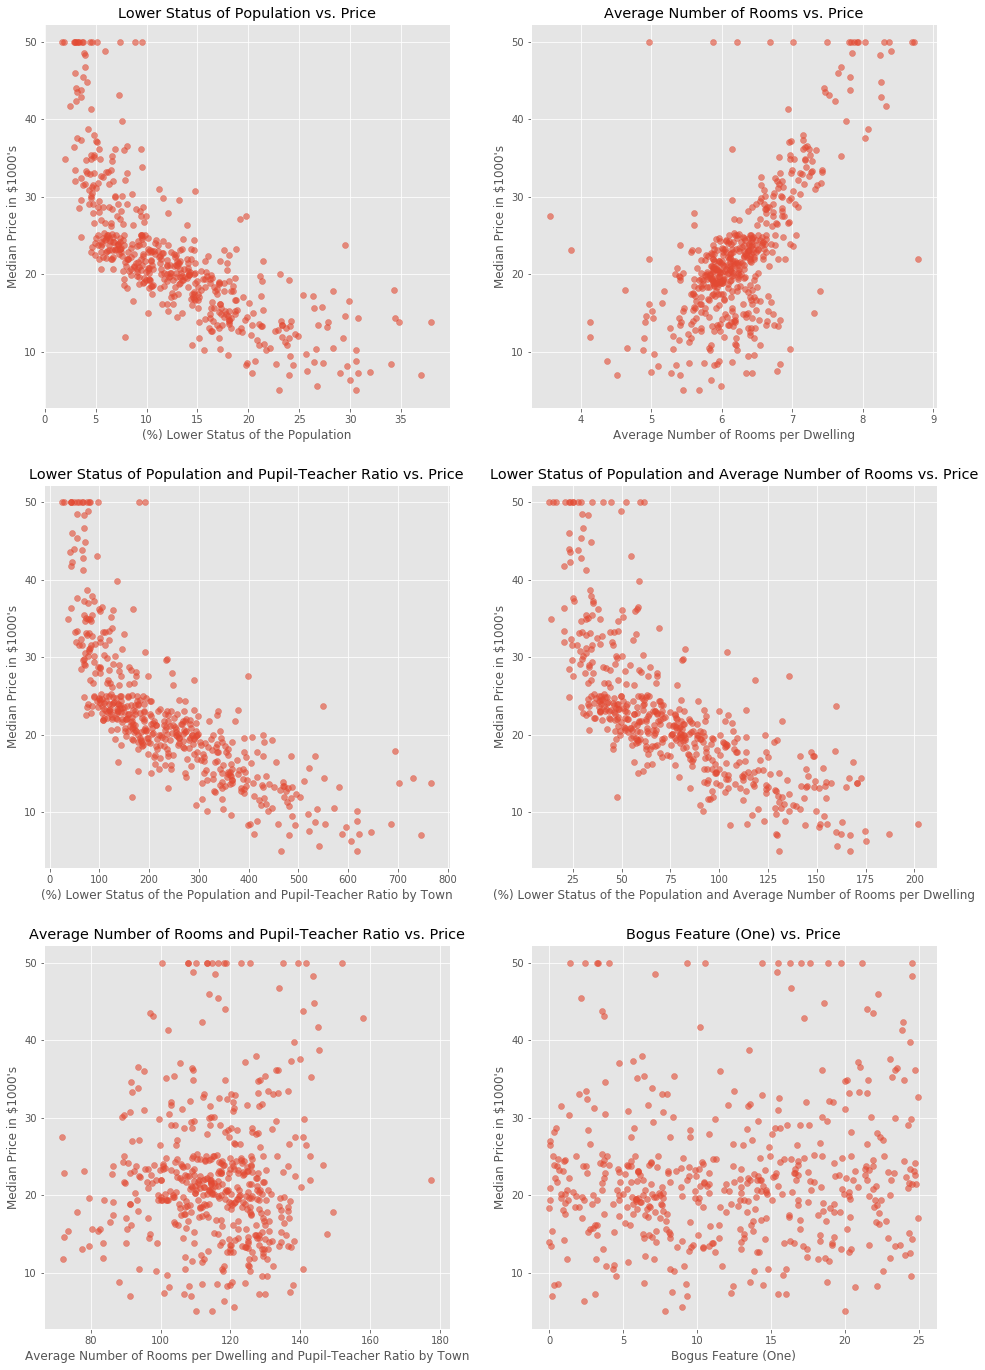

In [10]:
# graphical exploration
plt.style.use('ggplot')                                                    # define the style

plt.figure(figsize = (16, 24))

plt.subplot(3, 2, 1)
plt.scatter(boston_df.LSTAT, boston_df.MEDV, alpha = 0.6)                  # scatter plot
plt.title("Lower Status of Population vs. Price")                          # define the title
plt.ylabel("Median Price in $1000's")                                      # define the y-label
plt.xlabel("(%) Lower Status of the Population")                           # define the x-label

plt.subplot(3, 2, 2)
plt.scatter(boston_df.RM, boston_df.MEDV, alpha = 0.6)                     # scatter plot
plt.title("Average Number of Rooms vs. Price")                             # define the title
plt.ylabel("Median Price in $1000's")                                      # define the y-label
plt.xlabel("Average Number of Rooms per Dwelling")                         # define the x-label

plt.subplot(3, 2, 3)
plt.scatter(boston_df['LSTAT.PTRATIO'], boston_df.MEDV, alpha = 0.6)       # scatter plot
plt.title("Lower Status of Population and Pupil-Teacher Ratio vs. Price")  # define the title
plt.ylabel("Median Price in $1000's")                                      # define the y-label
plt.xlabel("(%) Lower Status of the Population and Pupil-Teacher Ratio by Town")  
                                                                           # define the x-label
    
plt.subplot(3, 2, 4)
plt.scatter(boston_df['LSTAT.RM'], boston_df.MEDV, alpha = 0.6)            # scatter plot
plt.title("Lower Status of Population and Average Number of Rooms vs. Price")
                                                                           # define the title
plt.ylabel("Median Price in $1000's")                                      # define the y-label
plt.xlabel("(%) Lower Status of the Population and Average Number of Rooms per Dwelling")  
                                                                           # define the x-label
    
plt.subplot(3, 2, 5)
plt.scatter(boston_df['RM.PTRATIO'], boston_df.MEDV, alpha = 0.6)          # scatter plot
plt.title("Average Number of Rooms and Pupil-Teacher Ratio vs. Price")     # define the title
plt.ylabel("Median Price in $1000's")                                      # define the y-label
plt.xlabel("Average Number of Rooms per Dwelling and Pupil-Teacher Ratio by Town") 
                                                                           # define the x-label

plt.subplot(3, 2, 6)
plt.scatter(boston_df.B1, boston_df.MEDV, alpha = 0.6)                     # scatter plot
plt.title("Bogus Feature (One) vs. Price")                                 # define the title
plt.ylabel("Median Price in $1000's")                                      # define the y-label
plt.xlabel("Bogus Feature (One)")                                          # define the x-label

plt.show()                                                                 # show the plot

## 2) Warm-up: A Few Simple Models

### 2.1) Loss Function

### 2.1.1) Write this function. The function should take three inputs: a) the estimated model (or just the estimated parameters beta); b) the test data X; and the test labels y. You may add other inputs if you consider it useful, for instance controls for print verbosity.

In [11]:
# define the function
def loss_function(model, X, y):
    """This function accepts the model, test data and test labels and returns the mean quadratic loss"""
    
    # compute the predicted y values
    X_beta = model.intercept_ + np.dot(X, model.coef_.T)
    
    # compute the error in prediction
    error = y - X_beta
    
    # return statement
    return(np.dot(error.T, error) / len(error))

### 2.2) A Few Simple Regressions

### 2.2.1) Create a small model. It should include 1-2 variables you consider 'relevant', i.e. features you think should be closely related to price.

In [12]:
#define the model
linear_regression_one = LinearRegression()

# fit the data to the model
linear_regression_one.fit(boston_df[['LSTAT', 'LSTAT.PTRATIO']], boston_df[['MEDV']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 2.2.2) 10-fold cross-validate this model to get the average MSE score (the value of your loss function).

In [13]:
# perform the 10-fold cross validation
ten_fold_cv_one = cross_validate(LinearRegression(), X = boston_df[['LSTAT', 'LSTAT.PTRATIO']], y = boston_df[['MEDV']], 
                                 return_train_score = False, cv = 10, scoring = loss_function)

# print the average MSE score using the 'loss_function'
print("Average MSE score for the two-features model:", np.mean(ten_fold_cv_one['test_score']))

Average MSE score for the two-features model: 40.000332519482086


### 2.2.3) Now build the next model with 10 features. Add more features you consider relevant but also those you consider irrelevant. Compute 10-fold MSE for this model.

In [14]:
#define the model
linear_regression_two = LinearRegression()

# fit the data to the model
linear_regression_two.fit(boston_df[['LSTAT', 'LSTAT.PTRATIO', 'LSTAT.RM', 'RM2', 'LSTAT.INDUS', 
                                     'CRIM', 'ZN', 'INDUS', 'PTRATIO.INDUS', 'B']], boston_df[['MEDV']])

# perform the 10-fold cross validation
ten_fold_cv_two = cross_validate(LinearRegression(), X = boston_df[['LSTAT', 'LSTAT.PTRATIO', 'LSTAT.RM', 'RM2', 'LSTAT.INDUS', 
                                                                    'CRIM', 'ZN', 'INDUS', 'PTRATIO.INDUS', 'B']], 
                                 y = boston_df[['MEDV']], 
                                 return_train_score = False, cv = 10, scoring = loss_function)

# print the average MSE score using the 'loss_function'
print("Average MSE score for the ten-features model:", np.mean(ten_fold_cv_two['test_score']))

Average MSE score for the ten-features model: 24.647127414778602


### 2.2.4) Finally, include all your features and compute MSE. We call this the full model below.

In [15]:
#define the model
linear_regression_full = LinearRegression()

# fit the data to the model
linear_regression_full.fit(boston_df.loc[:, boston_df.columns != 'MEDV'], boston_df[['MEDV']])

# perform the 10-fold cross validation
ten_fold_cv_full = cross_validate(LinearRegression(), X = boston_df.loc[:, boston_df.columns != 'MEDV'], 
                                  y = boston_df[['MEDV']], 
                                  return_train_score = False, cv = 10, scoring = loss_function)

# print the average MSE score using the 'loss_function'
print("Average MSE score for the full-model:", np.mean(ten_fold_cv_full['test_score']))

Average MSE score for the full-model: 23.844887003994366


### 2.2.5) Compare the results. Which has the best performance?


We get the best performance for the 'full model' with all the features included (Average Mean Squared Error: 23.84). 

For the model with ten features, we get the average mean squared error of 24.65 and for the model with only two features, we get the average mean squared error of 40.00.

## 3) Find the Best Model

### 3.1) Can we evaluate all models?

### 3.1.1) How many different linear regression models can you build based on the features you have (including the ones you generated)?

In [16]:
# number of different linear regression models that we can build using 33 features
print(2 ** 33)

8589934592


### 3.1.2) Run a test: run the following loop a number of times so that the total execution time is reasonably long (at least 5 seconds) but not too long. 
### (a) choose a random number of different features
### (b) estimate the model based on these features
### (c) run 10-fold CV to get the MSE score for this model.

In [17]:
# store the start time
start_time = time.time()

# list to store the average mean squared errors
average_mse = []

# create a loop for performing the above tasks
for i in range(250):
    
    features = []                                               # to store the feature indices
    number_of_features = random.randint(1, 33)                  # random number of features
    
    for j in range(number_of_features):                         # loop through the number of features
        
        feature = random.randint(0, 33)                         # randomly select the feature index
        
        if feature == 13 or feature in features:                # check for repetition and not select 'MEDV' as a feature
            j -= 1
            
        else:            
            features.append(feature)                            # append to the feature list
            
    if len(features) == 0:                                      # perform check to avoid 0 features in the list
        i -= 1
        continue
            
    # perform the 10-fold cross validation
    ten_fold_cv = cross_validate(LinearRegression(), X = boston_df.iloc[:, features], y = boston_df[['MEDV']], 
                                 return_train_score = False, cv = 10, scoring = loss_function)

    # print the average MSE score using the 'loss_function'
    mean_mse = np.mean(ten_fold_cv['test_score'])
    
    average_mse.append(mean_mse)                                # append the average mse list
            
# print the time taken
print("Time Taken (Seconds):", round(time.time() - start_time, 2))

Time Taken (Seconds): 5.31


### 3.1.3) Based on the test timings, calculate how long time it would take to evaluate all the possible models. Would it be possible to store all the resulting MSE(s) in your computer's memory?

We observe that it takes ~ 5.5 seconds for 250 iterations.

In [18]:
# approximate time (in years) it would take for all the possible models
time = ((((2 ** 33) / 250) * 5.5) / 60 / 60 / 24 / 365)

print("It would take approximately", round(time, 2), "years to evaluate all the possible models.")

# approximate space required to store all the average mean squared errors
space = ((((2 ** 33) / 250) * getsizeof(average_mse)) / 1024 / 1024 / 1024)

print("It would take approximately", round(space, 2), "gigabytes to store all the average MSE(s).")

It would take approximately 5.99 years to evaluate all the possible models.
It would take approximately 70.91 gigabytes to store all the average MSE(s).


### 3.2) Forward Selection

### 3.2.1) James et al. (2015, section 6.1), in particular page 207.

### 3.2.2) Create a series of 1-feature models and pick the best one by 10-fold CV. Note: always include the constant.

### 3.2.3) Pick the feature with the lowest loss. This is your 1-feature model.

In [19]:
# dictionary to store the average mse(s)
average_error = {}

# loop through all the features
for i in boston_df.columns:
    
    if i == 'MEDV':                                    # continue if feature index is for 'MEDV'
        continue
        
    # perform the 10-fold cross validation
    ten_fold_cv = cross_validate(LinearRegression(), X = boston_df.loc[:, [i]], y = boston_df[['MEDV']], 
                                 return_train_score = False, cv = 10, scoring = loss_function)

    # print the average MSE score using the 'loss_function'
    mean_mse = np.mean(ten_fold_cv['test_score'])
    
    average_error[i] = mean_mse                 # append the average mse list

print("Best one-feature model:", min(average_error, key = average_error.get))

Best one-feature model: LSTAT.PTRATIO


### 3.2.4) Repeat the procedure with more features until all features are included.
### 3.2.5) Pick the best model using Cp, AIC, BIC or adjusted R2 (consult James et al. (2015, section 6.1.3)). This is your forward-selection model.

In [20]:
# accumulating feature list
feature_list = []

# dictionary to store AIC, BIC and adjusted R-squared
score = {}

# list of all the features
feature_columns = [x for x in boston_df.columns if x != 'MEDV']

# loop through all the features, adding the best feature into the model one at a time
while len(feature_columns) != 0:
    
    # dictionary to store the average mse(s)
    average_error = {}
    
    for i in feature_columns:
    
        # perform the 10-fold cross validation
        ten_fold_cv = cross_validate(LinearRegression(), X = boston_df.loc[:, [i]], y = boston_df[['MEDV']], 
                                     return_train_score = False, cv = 10, scoring = loss_function)

        # print the average MSE score using the 'loss_function'
        mean_mse = np.mean(ten_fold_cv['test_score'])
    
        average_error[i] = mean_mse                                     # append the average mse list
        
    feature_list.append(min(average_error, key = average_error.get))    # append the feature list
    
    feature_columns.remove(min(average_error, key = average_error.get)) # remove the best feature from the next iteration
    
    fitted_model = sm.OLS(boston_df['MEDV'], boston_df.loc[:, feature_list]).fit()
                                                                        # fit the OLS model
    
    score[len(feature_list)] = (fitted_model.aic, fitted_model.bic, fitted_model.rsquared_adj)
                                                                        # store the AIC, BIC and adjusted R-squared

In [21]:
# create the outcome dataframe        
outcome = pd.DataFrame(score).transpose()
outcome.columns = ['AIC', 'BIC', 'Adjusted R-squared']

print("Features in the model with lowest AIC: \n")
print(outcome[outcome['AIC'] == min(outcome['AIC'])], "\n\n")

print("Features in the model with lowest BIC: \n")
print(outcome[outcome['BIC'] == min(outcome['BIC'])], "\n\n")

print("Features in the model with highest Adjusted R-squared: \n")
print(outcome[outcome['Adjusted R-squared'] == max(outcome['Adjusted R-squared'])])

Features in the model with lowest AIC: 

            AIC         BIC  Adjusted R-squared
33  2759.038329  2898.51404            0.978333 


Features in the model with lowest BIC: 

            AIC         BIC  Adjusted R-squared
22  2766.412153  2859.39596             0.97756 


Features in the model with highest Adjusted R-squared: 

            AIC         BIC  Adjusted R-squared
33  2759.038329  2898.51404            0.978333


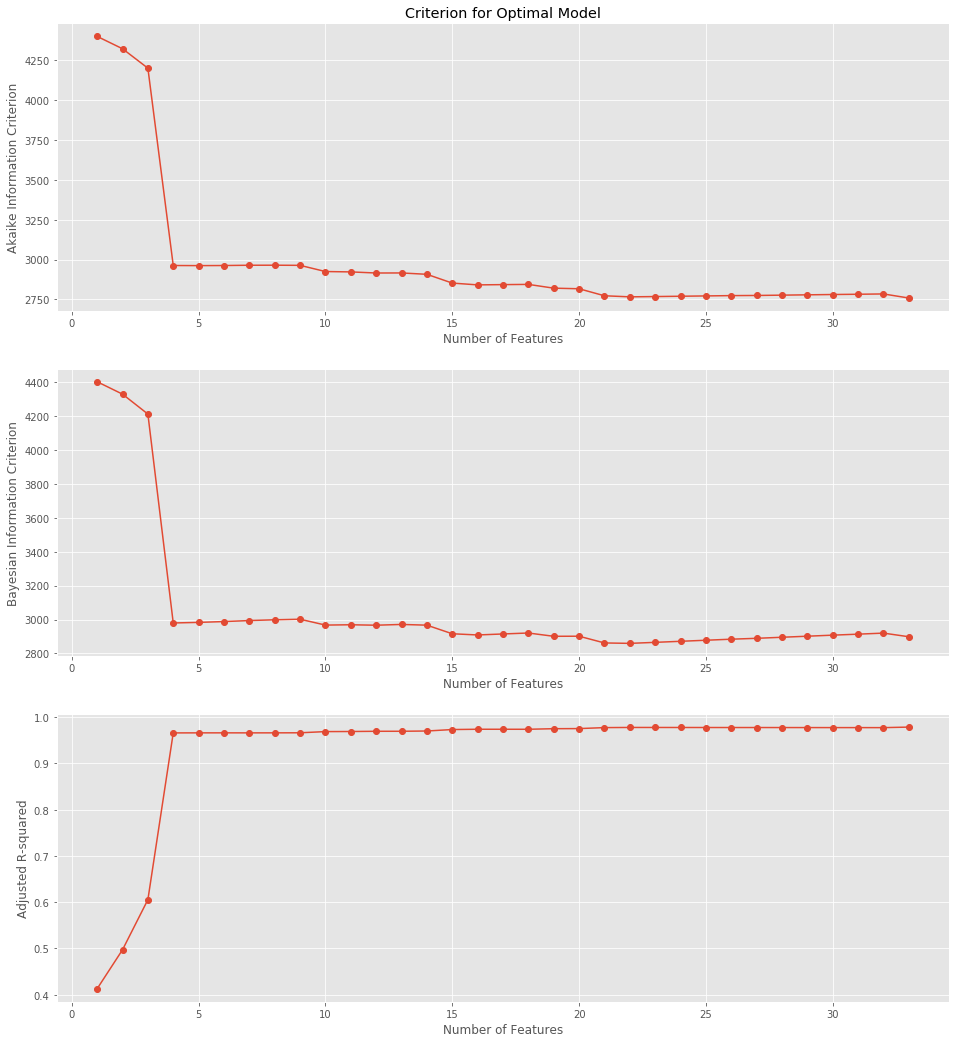

In [22]:
plt.figure(figsize = (16, 18))

plt.subplot(3, 1, 1)
plt.title("Criterion for Optimal Model")                        # define the title
plt.plot(outcome.index, outcome['AIC'], marker = 'o')           # plot AIC
plt.ylabel("Akaike Information Criterion")                      # define the y-label
plt.xlabel("Number of Features")                                # define the x-label

plt.subplot(3, 1, 2)
plt.plot(outcome.index, outcome['BIC'], marker = 'o')           # plot BIC
plt.ylabel("Bayesian Information Criterion")                    # define the y-label
plt.xlabel("Number of Features")                                # define the x-label

plt.subplot(3, 1, 3)
plt.plot(outcome.index, outcome['Adjusted R-squared'], marker = 'o')
                                                                # plot adjusted R-squared
plt.ylabel("Adjusted R-squared")                                # define the y-label
plt.xlabel("Number of Features")                                # define the x-label
plt.show()

We observe that the optimal model strictly as per the lowest AIC and highest adjusted R-squared is the full model with all the 33 features. Best model as per the lowest BIC is the model with first 22 features in the forward selection model.

Furthermore, we observe that after the addition of the 4th feature in the model, the AIC, BIC and adjusted R-squared curves do not vary significantly upon addition of new features. This suggests that we could consider the optimal model as the one with the first four features.

In [23]:
# features in the optimal model
feature_list[:4]

['LSTAT.PTRATIO', 'LSTAT', 'LSTAT.RM', 'RM2']

## 4) Principal Components

### 4.1) Use Raw Features

### 4.1.1) Consult James et al. (2015) sections 6.3 and 10.2.
### 4.1.2) Perform Principal Component Analysis on all the features in your data (except the target (price) medv).
### Extract all components (the number should equal to the number of features) and report:
### (a) Variance explained by each component
### (b) Proportional variance explained by each component
### (c) Cumulative variance explained up to each component.

Variance Explained (for each component):

 [1.43990555e+05 3.02079245e+04 1.15136006e+04 6.52603742e+03
 5.09957059e+03 9.16548325e+02 7.44244092e+02 4.19992054e+02
 3.51513146e+02 2.24350504e+02 1.56215060e+02 6.22754287e+01
 6.07055402e+01 5.71391136e+01 5.70498026e+01 5.48723114e+01
 5.03420589e+01 4.59614545e+01 4.54690139e+01 4.42634826e+01
 4.17483916e+01 3.72860163e+01 3.30073639e+01 2.13441282e+01
 8.70653015e+00 1.66165684e+00 1.02820748e+00 1.76364340e-01
 6.94902608e-02 7.38193922e-03 1.88855021e-03 7.61085126e-04] 

Variance Ratio (for each component):

 [7.17178486e-01 1.50457601e-01 5.73461688e-02 3.25044489e-02
 2.53995987e-02 4.56508234e-03 3.70688099e-03 2.09186822e-03
 1.75079307e-03 1.11742993e-03 7.78065482e-04 3.10177273e-04
 3.02358078e-04 2.84594660e-04 2.84149826e-04 2.73304324e-04
 2.50740346e-04 2.28921726e-04 2.26469011e-04 2.20464581e-04
 2.07937585e-04 1.85711686e-04 1.64400861e-04 1.06309400e-04
 4.33649007e-05 8.27626882e-06 5.12122675e-06 8.78423662e-07


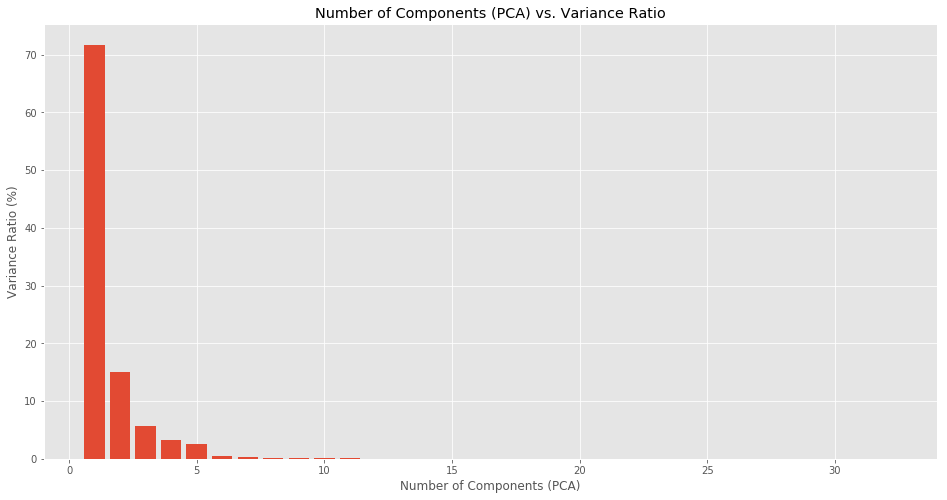

In [24]:
# initialize the PCA
pca = PCA()

# fit/compute the PCA
pca.fit(boston_df.loc[:, np.logical_and(boston_df.columns != 'MEDV', boston_df.columns != 'CHAS')])

# extract the components
components = pca.components_

# a) variance explained by each component
variance_explained = pca.explained_variance_

# b) proportional variance explained by each component
variance_ratio = pca.explained_variance_ratio_

# c) cumulative variance explained upto each component
cumulative_variance = np.cumsum(variance_explained)
cumulative_variance_ratio = np.cumsum(variance_ratio)

print("Variance Explained (for each component):\n\n", variance_explained, "\n")    
print("Variance Ratio (for each component):\n\n", variance_ratio, "\n")    
print("Cumulative Variance Explained (upto each component):\n\n", cumulative_variance, "\n")
print("Cumulative Variance Ratio (upto each component):\n\n", cumulative_variance_ratio, "\n")

# plot the variance ratio for each component
plt.figure(figsize = (16, 8))
plt.bar(np.arange(len(variance_ratio)) + 1, variance_ratio * 100)
plt.title("Number of Components (PCA) vs. Variance Ratio")
plt.xlabel('Number of Components (PCA)')
plt.ylabel('Variance Ratio (%)')
plt.show()

### 4.1.3) Rotate data: rotate the original features according to the principal components. Most packages have this function built-in but you can consult Leskovec et al. (2014, chapter 11.2.1) for details and interpretation.

In [25]:
# rotate the original features according to the principal components
pca_features = pd.DataFrame(pca.fit_transform(boston_df.loc[:, np.logical_and(boston_df.columns != 'MEDV', 
                                                                              boston_df.columns != 'CHAS')]))

### 4.1.4) Find the optimal model in rotated data: estimate the regression model explaining the housing value by the rotated features. Start with the first (most important) rotated feature and add rotated features to the model one-by-one. Each time cross-validate your result.

In [26]:
# create a list to store the average MSE with addition of each feature
average_pca_error = []

# loop through each transformed feature
for i in pca_features.columns:
    
    # perform the 10-fold cross validation
    ten_fold_cv_pca = cross_validate(LinearRegression(), X = pca_features.iloc[:, :(i + 1)], y = boston_df[['MEDV']], 
                                     return_train_score = False, cv = 10, scoring = loss_function)
    
    # print the average MSE score using the 'loss_function'
    mean_mse_pca = np.mean(ten_fold_cv_pca['test_score'])
    
    # append the average_pca_error list
    average_pca_error.append(mean_mse_pca)                                    # append the average mse list
    
# print the outcome
print(average_pca_error)

[50.5479094006503, 49.731669900563865, 49.0326499816868, 50.44948778030708, 41.85779023134505, 40.60696146737754, 35.9913401922705, 36.68079893883356, 35.91434735013502, 33.268360439906736, 37.9225848143366, 36.844489028875, 36.62001254996557, 36.834497250102785, 36.285141277237, 36.34012440679769, 35.87941014296442, 36.2999648149011, 36.48454710063514, 38.91483360292118, 41.303776060652794, 42.06970215619445, 28.126489572089078, 33.739853716671234, 32.06325863029666, 24.28797300130961, 23.476744899262158, 23.095409456624843, 23.67757008960686, 22.428756194918343, 22.848483996777915, 23.828935099852075]


### 4.1.5) Show a plot how cross-validated MSE depends on the number of components. Which number of components will give you the smallest MSE?

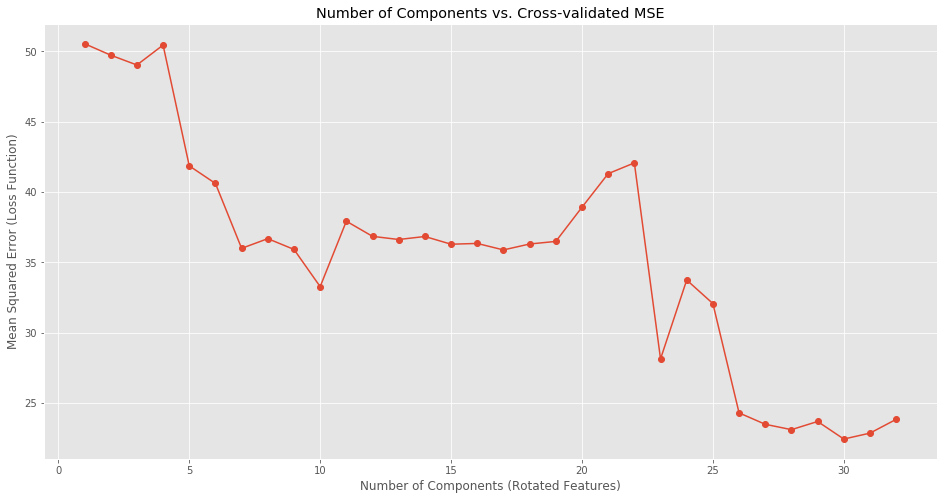

In [27]:
plt.figure(figsize = (16, 8))                                     # define figure size

plt.plot((np.arange(32) + 1), average_pca_error, marker = 'o')    # make the plot
plt.title('Number of Components vs. Cross-validated MSE')         # give title
plt.xlabel("Number of Components (Rotated Features)")             # give x-axis label
plt.ylabel("Mean Squared Error (Loss Function)")                  # give y-axis label

plt.show()                                                        # show the plot

The smallest cross-validated MSE is given by the model with 30 components.

## 4.2) PCA on Normalized Data

### 4.2.1) Code such a function and apply this to all explanatory variables in your data (but not to the target). This gives you a normalized data matrix Xn.

In [28]:
# create a dataframe with same dimensions as boston_df
norm_boston_df = pd.DataFrame().reindex_like(boston_df)

# perform mean normalization
for i in norm_boston_df.columns:
    
    if (i != 'MEDV') & (i != 'CHAS'):
        
        # perform mean normalization column-wise
        norm_boston_df[i] = (boston_df[i] - np.mean(boston_df[i])) / np.std(boston_df[i])

### 4.2.2) Repeat the analysis in 4.1 with normalized data.

Variance Explained (for each component) for Normalized Dataset:

 [1.16809409e+01 2.78706987e+00 2.17362029e+00 1.54212392e+00
 1.25304871e+00 1.19801917e+00 1.16212543e+00 1.09609540e+00
 1.07412536e+00 1.04654816e+00 9.38840646e-01 8.97233512e-01
 8.62413091e-01 8.27458280e-01 7.76738156e-01 7.15303777e-01
 6.54340107e-01 4.37622993e-01 3.23517437e-01 2.14569412e-01
 1.75480054e-01 8.08086999e-02 6.60562837e-02 3.61381253e-02
 1.72673717e-02 1.16357575e-02 4.82929651e-03 3.72751003e-03
 3.07245390e-03 1.10559659e-03 1.00096846e-03 4.89635631e-04] 

Variance Ratio (for each component) for Normalized Dataset:

 [3.64308000e-01 8.69238071e-02 6.77913938e-02 4.80961325e-02
 3.90803852e-02 3.73641107e-02 3.62446482e-02 3.41852876e-02
 3.35000807e-02 3.26399962e-02 2.92807884e-02 2.79831351e-02
 2.68971474e-02 2.58069683e-02 2.42250969e-02 2.23090667e-02
 2.04077170e-02 1.36486914e-02 1.00899398e-02 6.69204256e-03
 5.47291424e-03 2.52028122e-03 2.06017930e-03 1.12708457e-03
 5.38538953e-04

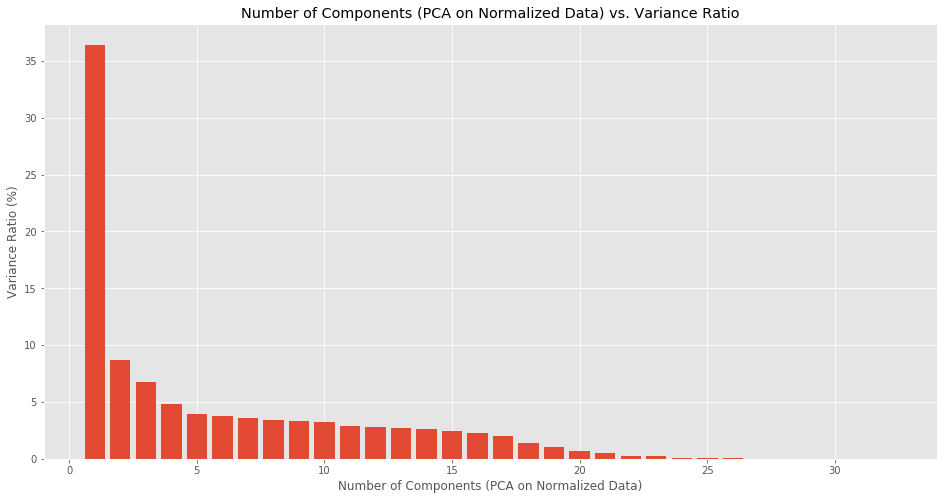

In [29]:
# initialize the PCA
pca_norm = PCA()

# fit/compute the PCA
pca_norm.fit(norm_boston_df.loc[:, np.logical_and(norm_boston_df.columns != 'MEDV', norm_boston_df.columns != 'CHAS')])

# extract the components
norm_components = pca_norm.components_

# a) variance explained by each component
norm_variance_explained = pca_norm.explained_variance_

# b) proportional variance explained by each component
norm_variance_ratio = pca_norm.explained_variance_ratio_

# c) cumulative variance explained upto each component
norm_cumulative_variance = np.cumsum(norm_variance_explained)
norm_cumulative_variance_ratio = np.cumsum(norm_variance_ratio)

print("Variance Explained (for each component) for Normalized Dataset:\n\n", norm_variance_explained, "\n")    
print("Variance Ratio (for each component) for Normalized Dataset:\n\n", norm_variance_ratio, "\n")    
print("Cumulative Variance Explained (upto each component) for Normalized Dataset:\n\n", norm_cumulative_variance, "\n")
print("Cumulative Variance Ratio (upto each component) for Normalized Dataset:\n\n", norm_cumulative_variance_ratio, "\n")

# plot the variance ratio for each component
plt.figure(figsize = (16, 8))
plt.bar(np.arange(len(norm_variance_ratio)) + 1, norm_variance_ratio * 100)
plt.title("Number of Components (PCA on Normalized Data) vs. Variance Ratio")
plt.xlabel('Number of Components (PCA on Normalized Data)')
plt.ylabel('Variance Ratio (%)')
plt.show()

In [30]:
# rotate the original features according to the principal components (normalized)
norm_pca_features = pd.DataFrame(pca_norm.fit_transform(norm_boston_df.loc[:, np.logical_and(norm_boston_df.columns != 'MEDV', 
                                                                                             norm_boston_df.columns != 'CHAS')]))

In [31]:
# create a list to store the average MSE with addition of each feature
norm_average_pca_error = []

# loop through each transformed feature
for i in norm_pca_features.columns:
    
    # perform the 10-fold cross validation
    norm_ten_fold_cv_pca = cross_validate(LinearRegression(), X = norm_pca_features.iloc[:, :(i + 1)], 
                                          y = boston_df[['MEDV']], return_train_score = False, 
                                          cv = 10, scoring = loss_function)
    
    # print the average MSE score using the 'loss_function'
    norm_mean_mse_pca = np.mean(norm_ten_fold_cv_pca['test_score'])
    
    # append the average_pca_error list
    norm_average_pca_error.append(norm_mean_mse_pca)                           # append the average mse list
    
# print the outcome
print(norm_average_pca_error)

[48.520833709706, 42.154903257704, 29.586853210642694, 30.614426015649705, 30.89042014841031, 31.548512502415274, 31.651749379292305, 31.857390739075907, 32.19827111285437, 32.22482481301185, 32.55981254162002, 32.66982915850353, 33.59564536082537, 33.9793485262164, 34.72353727092589, 34.82224591258306, 33.174715610322046, 36.93607211335879, 38.135293566053925, 37.12030873129042, 34.54859420699281, 28.809681104637377, 25.67115895034676, 25.208645488662505, 21.668440339791836, 21.07232016612977, 24.283145465795844, 21.474075801128134, 21.287216718781462, 21.939696585964896, 23.608197117392447, 23.82893509985206]


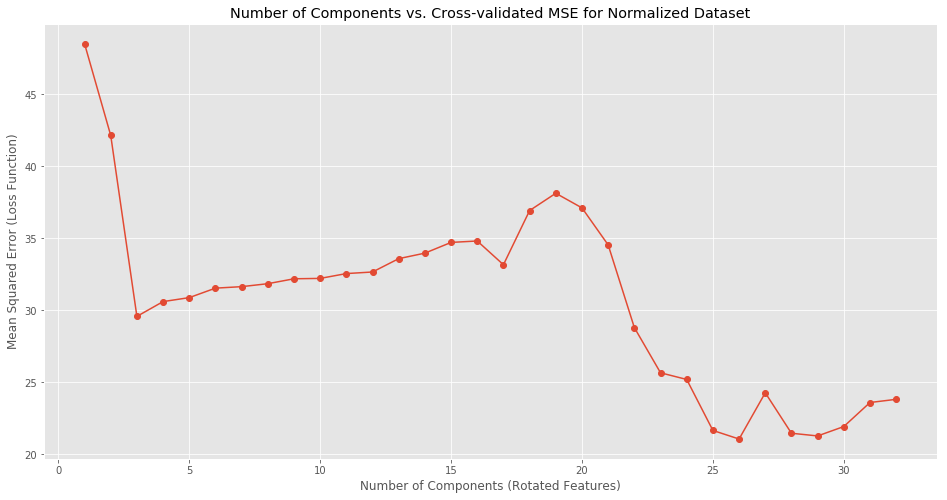

In [32]:
plt.figure(figsize = (16, 8))                                          # define figure size

plt.plot((np.arange(32) + 1), norm_average_pca_error, marker = 'o')    # make the plot
plt.title('Number of Components vs. Cross-validated MSE for Normalized Dataset')
                                                                       # give title
plt.xlabel("Number of Components (Rotated Features)")                  # give x-axis label
plt.ylabel("Mean Squared Error (Loss Function)")                       # give y-axis label

plt.show()                                                             # show the plot

The smallest cross-validated MSE is obtained for the model with 26 components.

## 4.3 What's the best solution?

### Compare all your results: full model, forward selection, PCA on raw data, and PCA on normalized data. Which one is most precise? Which one is most compact? Which one is the easiest to do? Which one is the most straightforward to interpret?

- We observe that the most precise model is the PCA on normalized data with 27 components which has the smallest average-MSE (20.70).


- Based on the AIC, BIC and Adjusted R-squared, we observe that the most compact model is the one with the first four features ['LSTAT.PTRATIO', 'LSTAT', 'LSTAT.RM', 'RM2']. In the AIC, BIC and Adjusted R-squared plots, we see that after the addition of these four features into our model, the graph doesn't change much and gives out almost constant scores upon addition of more features. This suggests that there is no significant difference in the performance of the model if we add more features.


- The model with ['LSTAT.PTRATIO', 'LSTAT', 'LSTAT.RM', 'RM2'] features is also the easiest to do and interpret as the number of features are less which gives rise to the desired simplicity in our model. Furthermore, I understand that it's not the most precise model, but the most precise model of 27-components PCA is difficult to interpret.